<a href="https://colab.research.google.com/github/anhdang1/stock-correlation-analysis/blob/main/Practice_eod_analysis_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are provided two csv files. The first, is the file used in the code below, and is provided for you to run the code below.  The second, which will have the letters 'prj' as part of the filename, is for use with your deliverable. It is recommended that 

1.   you keep this notebook (ipynb file) as is for reference and testing (do the testing as you watch the video)
2.   make a copy of it  (File:Save a Copy in Drive from above)
3.   rename the new file to include prj1A  if you are team 1 in morning section
4.   use the prj csv file with that
5.   and start editing the code cells as instructed
6.   at the end, add text cells to enter responses to questions asked

turn in the notebook (ipynb) as your deliverable (it must work with the csv we provided)
You may share a link to the notebook in addition to the notebook itself.



In [84]:
import numpy as np
import pandas as pd
from pylab import mpl,plt
plt.style.use('seaborn')
%matplotlib inline

In your project notebook: **you will need to edit the cell below to match the file provided. Consult the video!**

In [83]:
df = pd.read_csv('stock_price_data_eod_prj.csv', usecols=[0,2,4], parse_dates = True) #importing close price, symbol, and date 

In [ ]:
df.head()  #head is first few rows

,date,close,ticker
0,2020-12-31T00:00:00+0000,1752.64,GOOGL
1,2020-12-30T00:00:00+0000,1736.25,GOOGL
2,2020-12-29T00:00:00+0000,1757.76,GOOGL
3,2020-12-28T00:00:00+0000,1773.96,GOOGL
4,2020-12-24T00:00:00+0000,1734.16,GOOGL


**In your project notebook you will need to edit the line below**

In [ ]:
df4 = df.pivot_table(index = 'date',columns = 'ticker', values = 'close') #pivoting so that symbols become individual columns

For your project, in the steps below, **make and use a new df4 instead of the df2. That new frame is to contain only four stocks, any four from the dataset.** hint: see how msft and amazon columns are selected  from df2 below in the correlation analysis.

In [ ]:
df4.head()

ticker,ABT,AMZN,BABA,DIS,FB,GOOGL,JNJ,JPM,MA,MSFT,NFLX,NVDA,PYPL,WMT
date,,,,,,,,,,,,,,
2020-08-11T00:00:00+0000,99.06,3080.67,248.42,130.49,256.13,1480.54,146.97,103.82,328.54,203.38,466.93,434.00,189.03,130.20
2020-08-12T00:00:00+0000,100.65,3162.24,255.19,131.79,259.89,1507.24,149.66,102.94,327.63,209.19,475.47,457.61,191.32,131.89
2020-08-13T00:00:00+0000,101.10,3161.02,253.72,130.96,261.30,1516.65,148.00,102.37,326.19,208.70,481.33,457.72,193.07,131.85
2020-08-14T00:00:00+0000,99.99,3148.02,253.97,130.53,261.24,1504.63,148.24,102.41,326.80,208.90,482.68,462.56,191.46,132.60
2020-08-17T00:00:00+0000,100.71,3182.41,256.96,129.37,261.16,1516.24,148.99,99.71,330.23,210.28,482.35,493.48,196.29,135.60


In [ ]:
df4.info() #a better processing would process the dates so that pandas recognizes them as dates.  Also only 100 entries here, not enough.

In [ ]:
df4.plot(figsize=(14,12),  subplots = True)  

In [85]:
df4.describe().round(2)  #summary stats, rounded

ticker,ABT,AMZN,BABA,DIS,FB,GOOGL,JNJ,JPM,MA,MSFT,NFLX,NVDA,PYPL,WMT,SMA1,SMA2,positions
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df4.mean()   #means only

In [ ]:
df4.diff().head()      #daily returns  NaN is Not a Number.  

In [ ]:
df4.pct_change().round(3).head()  #percent changes

ticker,ABT,AMZN,BABA,DIS,FB,GOOGL,JNJ,JPM,MA,MSFT,NFLX,NVDA,PYPL,WMT,SMA1,SMA2,positions
date,,,,,,,,,,,,,,,,,


In [ ]:
df4.pct_change().mean().plot(kind = 'bar', figsize = (10,6))   #plot average percent changes  

In [ ]:
returns = np.log(df4/df4.shift(1))

In [ ]:
returns.head().round(3)

In [ ]:
returns.cumsum().apply(np.exp).plot(figsize = (10,6))

Three code cells have been removed here.  They find the log returns, and plot the cumulative returns. **You are expected to re-do these cells using df4**. Consult the video

A simple technical analysis of one stock. Moving average for x days of a particular stock.

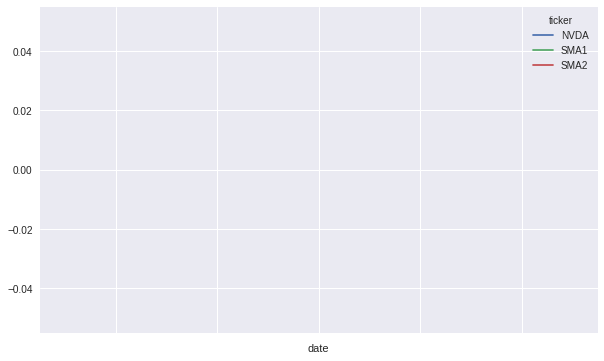

In [82]:
symbol = 'NVDA'  #a simplistic technical analysis on one stock. finding crossing over/under points of moving averages
df4['SMA1'] = df4[symbol].rolling(window = 10).mean()    #moving averages.  since only 100 days, 10 and 25 were chosen as windows
df4['SMA2'] = df4[symbol].rolling(window = 25).mean()
df4[[symbol,'SMA1','SMA2']].plot(figsize = (10,6))       #plotting to find crossing points of moving averages

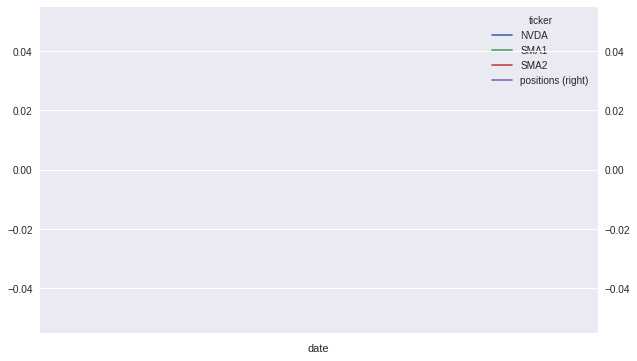

In [81]:
df4.dropna(inplace = True)     #get rid of NaNs.
df4['positions'] = np.where(df4['SMA1'] > df4['SMA2'], 1, -1 )   #an if..else  Go long if short term SMA above long term SMA (1)
axis = df4[[symbol,'SMA1','SMA2', 'positions']].plot(figsize = (10,6),secondary_y = 'positions')


In [ ]:
df4.head()  #just reviewing we still got the data


ticker,ABT,AMZN,BABA,DIS,FB,GOOGL,JNJ,JPM,MA,MSFT,NFLX,NVDA,PYPL,WMT,SMA1,SMA2,positions
date,,,,,,,,,,,,,,,,,
2020-11-20T00:00:00+0000,110.89,3099.40,270.74,141.07,269.70,1736.38,146.36,114.57,323.00,210.39,488.24,523.51,192.67,150.24,482.554,491.3752,-1
2020-11-23T00:00:00+0000,109.27,3098.39,270.11,145.98,268.43,1727.56,143.87,117.87,332.04,210.11,476.62,525.60,200.82,150.93,483.166,489.2112,-1
2020-11-24T00:00:00+0000,107.61,3118.06,279.96,151.49,276.92,1763.90,143.87,123.32,342.39,213.86,482.88,518.31,206.00,151.36,483.430,487.5096,-1
2020-11-25T00:00:00+0000,106.41,3185.07,277.72,149.09,275.59,1764.13,143.68,122.03,341.32,213.87,485.00,529.39,214.46,151.83,482.854,487.3476,-1
2020-11-27T00:00:00+0000,107.62,3195.34,276.48,147.13,277.81,1787.02,144.00,121.22,339.07,215.23,491.36,530.45,211.39,151.60,483.313,487.5928,-1


Let us compare two stocks to see if they are correlated.

In [ ]:
df3 = df4[['MSFT','AMZN']].dropna()   #extracting msft and amzn.  some say these move together. do they?
df3.head()

ticker,MSFT,AMZN
date,,
2020-12-28T00:00:00+0000,224.96,3283.96
2020-12-29T00:00:00+0000,224.15,3322.00
2020-12-30T00:00:00+0000,221.68,3285.85
2020-12-31T00:00:00+0000,222.42,3256.93


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fef9c52ac10>,
      dtype=object)

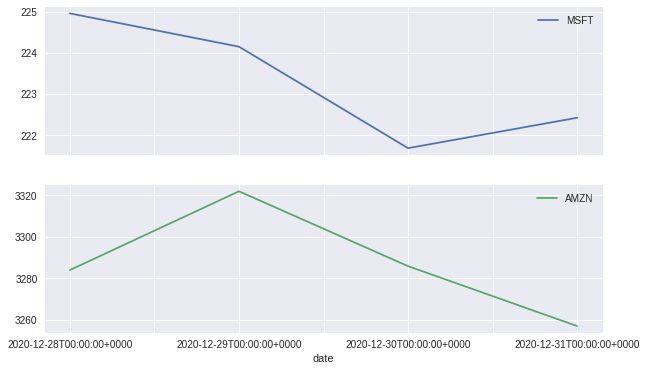

In [ ]:
df3.plot(subplots = True, figsize = (10,6))   # let us look at their plots to see if they are correlated

In [ ]:
rets = np.log(df3/df3.shift(1))      #taking a different look at possible correlation, by looking at log returns
rets.head()

ticker,MSFT,AMZN
date,,
2020-12-28T00:00:00+0000,NaN,NaN
2020-12-29T00:00:00+0000,-0.003607,0.011517
2020-12-30T00:00:00+0000,-0.011081,-0.010942
2020-12-31T00:00:00+0000,0.003333,-0.008840


In [ ]:
rets.dropna(inplace = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fef9c6ca710>,
      dtype=object)

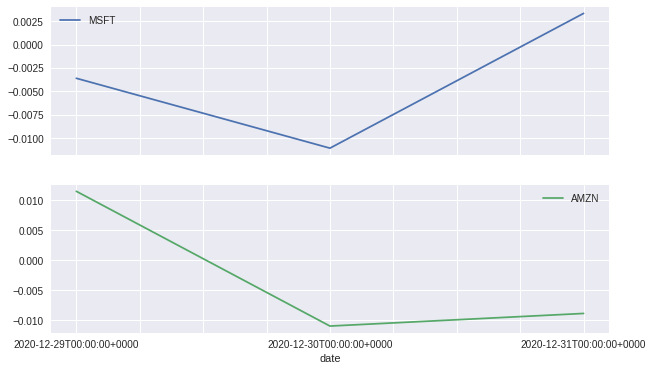

In [ ]:
rets.plot(subplots = True, figsize = (10,6)) #clearer evidence

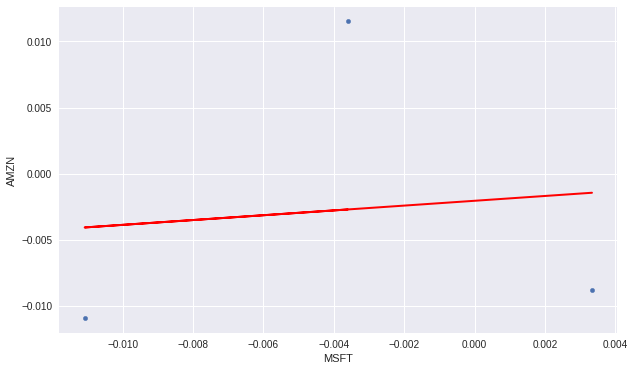

In [ ]:
regr = np.polyfit(rets['MSFT'], rets['AMZN'], deg = 1)  #doing an OLS regression to confirm
axs = rets.plot(kind = 'scatter', x = 'MSFT', y = 'AMZN', figsize = (10,6)) #scatter plot of log returns
axs.plot(rets['MSFT'], np.polyval(regr, rets['MSFT']), 'r', lw = 2)  #regression line overlay as red line

In [ ]:
rets.corr()  #let us just ask for the corr.value

**Answer these questions, each response taking max two sentences**
1.  What is the effect of subplots = True in the plot that shows all the symbols together (df2.plot or df4.plot)

What do each of the functions below do in pandas? (be very brief, no need to provide technical details)
2. diff()
3. dropna()
4. describe()
5. shift()

6. What is a dataframe in pandas?
